
# Titanic Logistic Regression Project

## Round 1

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

C:\Users\kolok\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kolok\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df1 = pd.read_csv('train.csv')

In [4]:
df1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It looks like we have missing data in Age and Cabin and Embarked

In [6]:
df1_1 = df1.dropna()

In [7]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


That was not a good drop. Let's just drop Cabin and save to df1_2

In [8]:
df1_2 = df1.drop('Cabin',axis=1)

In [9]:
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
df1_2_1 = df1_2.dropna()

In [11]:
df1_2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


We are happy with df1_2_1 because we get to keep 80% of the data

In [12]:
df1_2_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
df1_2_1['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

We will numerify Sex and Embarked columns and drop Name and Ticket columns (for now)

In [14]:
sex = pd.get_dummies(df1_2_1['Sex'],drop_first=True)
embark = pd.get_dummies(df1_2_1['Embarked'],drop_first=True)

In [15]:
df1_2_1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

C:\Users\kolok\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
train = pd.concat([df1_2_1,sex,embark],axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [147]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'isDoctor', 'Mrs', 'male', 'Q', 'S'],
      dtype='object')

### Machine Learning

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=111)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\kolok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       127
           1       0.80      0.70      0.75        87

    accuracy                           0.81       214
   macro avg       0.81      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214



### Round 2

We can do better so let's try looking at the Name column more closely 

In [25]:
df2_1 = df1_2.dropna()

In [26]:
# Does being a doctor correlate?
def isDoctor(x):
    if 'Dr.' in x:
        return True
    else:
        return False


In [27]:
df2_1[df2_1['Name'].apply(isDoctor)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S


Will this help our model?

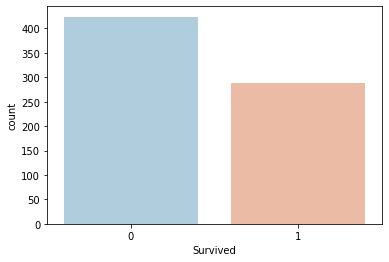

In [28]:
sns.countplot(x='Survived',data=df2_1,palette='RdBu_r')

It looks like being a doctor does not match the general trend because less people have survived and more people have died. Being a doctor has a 50% chance of survival and will actually increase a person on the Titanics chance of survival. This feature might improve upon the model.

In [29]:
def isDoctor(x):
    if 'Dr.' in x:
        return 1
    else:
        return 0


df2_1['isDoctor'] = df2_1['Name'].apply(isDoctor)

C:\Users\kolok\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# Does being a Mrs. help the model?
def isMrs(x):
    if 'Mrs' in x:
        return True
    else:
        return False

In [31]:
df2_1[df2_1['Name'].apply(isMrs)] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isDoctor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,0
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,0


It's too much data to see properly so we'll update our dataframe to a new dataframe

In [32]:
df2_1_1 = df2_1

def isMrs(x):
    if 'Mrs' in x:
        return 1
    else:
        return 0

df2_1_1["Mrs"] = df2_1_1['Name'].apply(isMrs)

C:\Users\kolok\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


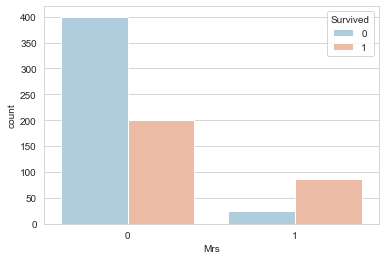

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Mrs',hue='Survived',data=df2_1_1,palette='RdBu_r')

It looks like being a "Mrs" really improves upon ones survival during the Titanic incident and we will incorporate this into our model and use this dataframe (df2_1_1)

In [34]:
df2_1_1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

C:\Users\kolok\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
train = pd.concat([df2_1_1,sex,embark],axis=1)

## Machine Learning 2


In [119]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=111)

In [120]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\kolok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       127
           1       0.82      0.70      0.76        87

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.81       214



Our model has improved and we are very happy with this improvement.

## Round 3

Let's go back to df1_2 and fill in the missing age data with estimates based on their Pclass

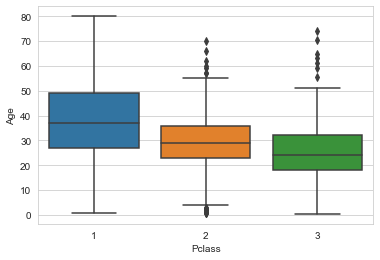

In [40]:
sns.boxplot(x='Pclass', y='Age', data=df1_2)

Based on the above visualization we can actually estimate someones age based on their Pclass. 

In [41]:
df1_2[df1_2['Pclass'] ==1]['Age'].mean()

38.233440860215055

In [42]:
df1_2[df1_2['Pclass'] ==2]['Age'].mean()

29.87763005780347

In [43]:
df1_2[df1_2['Pclass'] ==3]['Age'].mean()

25.14061971830986

In [44]:
def fillMissingAge(cols):
    pClass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        if pClass == 1:
            return 38.2
        elif pClass == 2:
            return 29.9
        else:
            return 25.1
    else:
        return age

In [45]:
df3 = df1_2
df3_1 = df3

In [46]:
df3_1['Age'] = df3_1[["Pclass", "Age"]].apply(fillMissingAge, axis=1)

In [47]:
df3_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
df3_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Looks good let's drop the two missing values

In [49]:
df3_1.dropna(inplace=True)

In [50]:
df3_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now let's incorporate the "Mrs" and "Dr" columns we learned about in Round 2

In [51]:
df3_1['isDoctor'] = df3_1['Name'].apply(isDoctor)
df3_1["Mrs"] = df3_1['Name'].apply(isMrs)

Before creating and testing another logistic model we need to numerify our string columns with dummy variables

In [52]:
sex = pd.get_dummies(df3_1['Sex'],drop_first=True)
embark = pd.get_dummies(df3_1['Embarked'],drop_first=True)
df3_1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([df3_1,sex,embark],axis=1)

## Machine Learning 3

In [140]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=114) # 114,111, 200, 99

In [141]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\kolok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       163
           1       0.85      0.76      0.80       104

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267



# Conclusion

We were able to sqeeze extra predictive power out of our model using some simple string processing. Our model looks pretty good with up to 4% improvement. This concludes this project.